# Import Dependencies

In [54]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
import datetime

# Input a path to my folder which contains the CSVs

In [55]:
path = (r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\CSVs")
CSVFiles = glob.glob(path + "/*.csv")

In [56]:
CSVFiles

['C:\\Users\\RebekahDSK\\Desktop\\Project_1_Moving_Violations\\CSVs\\Moving_Violations_Issued_in_April_2019 (1).csv',
 'C:\\Users\\RebekahDSK\\Desktop\\Project_1_Moving_Violations\\CSVs\\Moving_Violations_Issued_in_August_2019 (1).csv',
 'C:\\Users\\RebekahDSK\\Desktop\\Project_1_Moving_Violations\\CSVs\\Moving_Violations_Issued_in_December_2019 (2).csv',
 'C:\\Users\\RebekahDSK\\Desktop\\Project_1_Moving_Violations\\CSVs\\Moving_Violations_Issued_in_January_2019 (1).csv',
 'C:\\Users\\RebekahDSK\\Desktop\\Project_1_Moving_Violations\\CSVs\\Moving_Violations_Issued_in_July_2020.csv',
 'C:\\Users\\RebekahDSK\\Desktop\\Project_1_Moving_Violations\\CSVs\\Moving_Violations_Issued_in_June_2019 (1).csv',
 'C:\\Users\\RebekahDSK\\Desktop\\Project_1_Moving_Violations\\CSVs\\Moving_Violations_Issued_in_March_2019 (1).csv',
 'C:\\Users\\RebekahDSK\\Desktop\\Project_1_Moving_Violations\\CSVs\\Moving_Violations_Issued_in_May_2019 (1).csv',
 'C:\\Users\\RebekahDSK\\Desktop\\Project_1_Moving_Violati

# Create a list to hold data from all 2019 CSV files

In [57]:
list_data = []

# Create a loop which adds each CSV file in the 'Path' folder into the 'list_data' list

In [5]:
for filename in CSVFiles:
    df = pd.read_csv(filename, index_col=None, header=0, low_memory=False)
    list_data.append(df)

### Create a DataFrame that contains all 11 CSV files
* The DataFrame contains one file for every available month of 2019
* Print a preview of the DataFrame

In [6]:
all_data_twozeroonenine_df = pd.concat(list_data, axis=0, ignore_index=True)

all_data_twozeroonenine_df.head()

,OBJECTID,LOCATION,XCOORD,YCOORD,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,...,RP_MULT_OWNER_NO,BODY_STYLE,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM,DRV_LIC_STATE,DOB_YEAR,VEH_YEAR,VEH_MAKE
0,8730,1400 BRANCH AVE SE,403440.57,133762.28,2019/04/29 04:00:00+00,1:30:00,6,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,...,NaN,NaN,38.872,-76.96,307585.0,2020/09/30 03:44:25+00,DC,1985.0,NaN,CHRY
1,8731,I-295 ANACOSTIA FWY,NaN,NaN,2019/04/01 04:00:00+00,9:55:00,6,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,...,NaN,NaN,NaN,NaN,NaN,2020/09/30 03:44:25+00,DC,1972.0,NaN,HOND
2,10053,I 395 N/B HOV BRIDGE SW,NaN,NaN,2019/04/18 04:00:00+00,4:20:00,1,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,...,NaN,NaN,NaN,NaN,NaN,2020/09/30 03:44:25+00,VA,1987.0,NaN,MAZD
3,10054,1000 6TH ST NW,398273.55,137243.91,2019/04/23 04:00:00+00,3:00:00,1,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,...,NaN,NaN,38.903,-77.02,807095.0,2020/09/30 03:44:25+00,DC,1993.0,NaN,TOYO
4,10055,1000 6TH ST NW,398273.55,137243.91,2019/04/23 04:00:00+00,3:00:00,1,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T667,...,NaN,NaN,38.903,-77.02,807095.0,2020/09/30 03:44:25+00,DC,1993.0,NaN,TOYO


In [7]:
len(all_data_twozeroonenine_df)

1244642

### Let's see what columns we're working with
* Print the column headers using .columns
* Doing so allows us to see which columns we want to keep, and which we want to drop

In [8]:
all_data_twozeroonenine_df.columns

Index(['OBJECTID', 'LOCATION', 'XCOORD', 'YCOORD', 'ISSUE_DATE', 'ISSUE_TIME',
       'ISSUING_AGENCY_CODE', 'ISSUING_AGENCY_NAME', 'ISSUING_AGENCY_SHORT',
       'VIOLATION_CODE', 'VIOLATION_PROCESS_DESC', 'PLATE_STATE',
       'ACCIDENT_INDICATOR', 'DISPOSITION_CODE', 'DISPOSITION_TYPE',
       'DISPOSITION_DATE', 'FINE_AMOUNT', 'TOTAL_PAID', 'PENALTY_1',
       'PENALTY_2', 'PENALTY_3', 'PENALTY_4', 'PENALTY_5', 'RP_MULT_OWNER_NO',
       'BODY_STYLE', 'LATITUDE', 'LONGITUDE', 'MAR_ID', 'GIS_LAST_MOD_DTTM',
       'DRV_LIC_STATE', 'DOB_YEAR', 'VEH_YEAR', 'VEH_MAKE'],
      dtype='object')

### Clean up the DataFrame to include only the columns we need for analysis
* : indicates we want to keep all rows
* We determine the columns we want to keep by calling them out by their number
* The resulting DataFrame includes all 11 months (February being our caveat)
* Contains 1201351 rows
* Contains 14 columns

In [9]:
clean_twozeroonenine_df = all_data_twozeroonenine_df.iloc[:, [0, 1, 4, 5, 7, 8, 9, 10, 11, 12, 16, 29, 30, 32]]
clean_twozeroonenine_df.head()

,OBJECTID,LOCATION,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,FINE_AMOUNT,DRV_LIC_STATE,DOB_YEAR,VEH_MAKE
0,8730,1400 BRANCH AVE SE,2019/04/29 04:00:00+00,1:30:00,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,FOLLOW A VEHICLE TOO CLOSELY,DC,N,100.0,DC,1985.0,CHRY
1,8731,I-295 ANACOSTIA FWY,2019/04/01 04:00:00+00,9:55:00,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,FOLLOW A VEHICLE TOO CLOSELY,DC,N,75.0,DC,1972.0,HOND
2,10053,I 395 N/B HOV BRIDGE SW,2019/04/18 04:00:00+00,4:20:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,VA,Y,100.0,VA,1987.0,MAZD
3,10054,1000 6TH ST NW,2019/04/23 04:00:00+00,3:00:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,DC,Y,150.0,DC,1993.0,TOYO
4,10055,1000 6TH ST NW,2019/04/23 04:00:00+00,3:00:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T667,DEAD OR EXPIRED TAGS,DC,Y,100.0,DC,1993.0,TOYO


# Total number of violations issued for each month and for the year
* Determine the total number of violations issued for the year
* Using the clean, extracted DataFrame, pull out the Violation Code column
* . count() to get a total count of all violations given out for the 2019 year

In [10]:
total_number_of_violations_year = clean_twozeroonenine_df['VIOLATION_CODE'].count()
total_number_of_violations_year

1244642

### Determine the total number of violations issued Per Month
*Read in each month's csv
* I read in each month's CSV because it was the clearest way for me to extract the data. I'm sure there was a way to do it from the combined DataFrame, but I honestly didn't want to spend hours doing so.

In [11]:
# Read in each month's csv
january_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\CSVs\Moving_Violations_Issued_in_January_2019 (1).csv",low_memory=False)
march_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\CSVs\Moving_Violations_Issued_in_March_2019 (1).csv", low_memory=False)
april_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\CSVs\Moving_Violations_Issued_in_April_2019 (1).csv", low_memory=False)
may_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\CSVs\Moving_Violations_Issued_in_May_2019 (1).csv", low_memory=False)
june_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\CSVs\Moving_Violations_Issued_in_June_2019 (1).csv", low_memory=False)
july_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\CSVs\Moving_Violations_Issued_in_July_2020.csv", low_memory=False)
august_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\CSVs\Moving_Violations_Issued_in_August_2019 (1).csv", low_memory=False)
september_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\CSVs\Moving_Violations_Issued_in_September_2019 (1).csv", low_memory=False)
october_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\CSVs\Moving_Violations_Issued_in_October_2019 (4).csv", low_memory=False)
november_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\CSVs\Moving_Violations_Issued_in_November_2019 (1).csv", low_memory=False)
december_df = pd.read_csv(r"C:\Users\RebekahDSK\Desktop\Project_1_Moving_Violations\CSVs\Moving_Violations_Issued_in_December_2019 (2).csv", low_memory=False)

* Using .count(), I determined the total number of violations issued for each month

In [12]:
# Count the total number of violations for each month
total_number_violations_january = january_df['VIOLATION_CODE'].count()
total_number_violations_march = march_df['VIOLATION_CODE'].count()
total_number_violations_april = april_df['VIOLATION_CODE'].count()
total_number_violations_may = may_df['VIOLATION_CODE'].count()
total_number_violations_june = june_df['VIOLATION_CODE'].count()
total_number_violations_july = july_df['VIOLATION_CODE'].count()
total_number_violations_august = august_df['VIOLATION_CODE'].count()
total_number_violations_september = september_df['VIOLATION_CODE'].count()
total_number_violations_october = october_df['VIOLATION_CODE'].count()
total_number_violations_november = november_df['VIOLATION_CODE'].count()
total_number_violations_december = december_df['VIOLATION_CODE'].count()

* Next, I determined the percent each month made up of the total yearly violations
* (Total Number of Violations for X Month / Total Number of Violations for the Year)(100)

In [13]:
# Determine what percent each month accounts for of total yearly violations

january_percent_to_year_total = (total_number_violations_january / total_number_of_violations_year * 100)
march_percent_to_year_total = (total_number_violations_march / total_number_of_violations_year * 100)
april_percent_to_year_total = (total_number_violations_april / total_number_of_violations_year * 100)
may_percent_to_year_total = (total_number_violations_may / total_number_of_violations_year * 100)
june_percent_to_year_total = (total_number_violations_june / total_number_of_violations_year * 100)
july_percent_to_year_total = (total_number_violations_july / total_number_of_violations_year * 100)
august_percent_to_year_total = (total_number_violations_august / total_number_of_violations_year * 100)
september_percent_to_year_total = (total_number_violations_september / total_number_of_violations_year * 100)
october_percent_to_year_total = (total_number_violations_october / total_number_of_violations_year * 100)
november_percent_to_year_total = (total_number_violations_november / total_number_of_violations_year * 100)
december_percent_to_year_total = (total_number_violations_december / total_number_of_violations_year * 100)

* Then I created a DataFrame to hold the total violations for each month, and the percent each month made up of the total yearly violations issued

In [14]:
# Create a DataFrame that displays the total violations for each month, and each month's percent to total violations

total_number_violations_per_month = pd.DataFrame([{
    "Month":"January", "Number of Violations": total_number_violations_january, "Percent to Total":january_percent_to_year_total},
    {"Month":"March", "Number of Violations": total_number_violations_march, "Percent to Total": march_percent_to_year_total},
    {"Month":"April", "Number of Violations": total_number_violations_april, "Percent to Total": april_percent_to_year_total},
    {"Month":"May", "Number of Violations": total_number_violations_may, "Percent to Total": may_percent_to_year_total},
    {"Month":"June", "Number of Violations": total_number_violations_june, "Percent to Total": june_percent_to_year_total},
    {"Month":"July", "Number of Violations": total_number_violations_july, "Percent to Total": july_percent_to_year_total},
     {"Month":"August", "Number of Violations": total_number_violations_august, "Percent to Total": august_percent_to_year_total},
     {"Month":"September", "Number of Violations": total_number_violations_september, "Percent to Total": september_percent_to_year_total},
     {"Month":"October", "Number of Violations": total_number_violations_october, "Percent to Total": october_percent_to_year_total},
     {"Month":"November", "Number of Violations": total_number_violations_november, "Percent to Total": november_percent_to_year_total},
     {"Month":"December", "Number of Violations": total_number_violations_december, "Percent to Total": december_percent_to_year_total},
])

* Set the index to the Month
* Renamed the column 'Month'
* Printed the DataFrame

In [15]:
#total_number_violations_per_month = total_number_violations_per_month.set_index("Month")
#total_number_violations_per_month.index.name = 'Month'
total_number_violations_per_month.sort_values(['Number of Violations'], ascending=False)

,Month,Number of Violations,Percent to Total
5,July,158123,12.704296
6,August,149324,11.997345
4,June,143351,11.517448
3,May,110592,8.885447
2,April,108258,8.697923
1,March,105340,8.463478
7,September,102942,8.270812
8,October,98173,7.887650
0,January,94914,7.625807
9,November,94186,7.567317


### Two Charts for Total Number of Violations Per Month:
* Bar chart for number of violations per month
* Line chart for number of violations per month

### Bar Chart

* Barh makes it horizontal
* Legend=False removes the legend
* Color = 'choose desired color'
* Edgecolor = 'outlines the bar in a color'
* Figsize = (makes the chart taller, or longer)
* Fontsize = increases or decreases letter size
* Plt.grid = adds grid lines to chart

Text(0.5, 1.0, 'Total Count of Violations per Month for 2019')

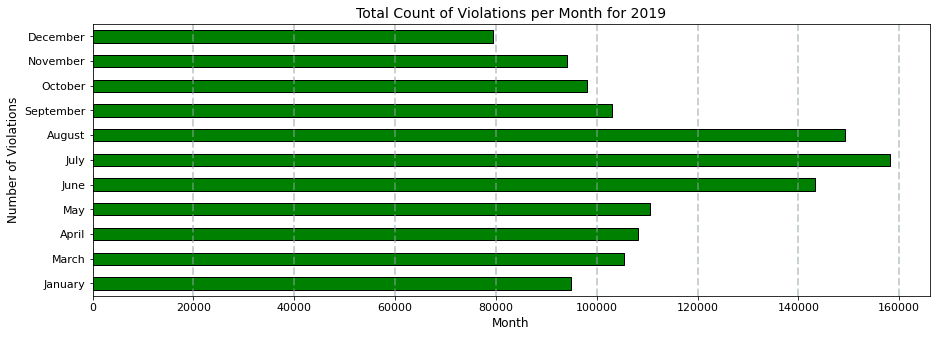

In [61]:
total_number_violations_per_month.plot(kind='barh', x='Month', y='Number of Violations', legend=False, color='green', edgecolor = 'black', figsize=(15,5), fontsize=11)
plt.ylabel('Number of Violations', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.5)
plt.title('Total Count of Violations per Month for 2019', fontsize=14)

### Line Chart

* Includes most of the same formatting options as above
* Marker = 'different shapes to denote data points

149,324 violations were issued in DC during August accounting for 12.43% of the total number of violations issued.
143,351 violations were issued during June, accounting for 11.93% of the total number of violations issued.


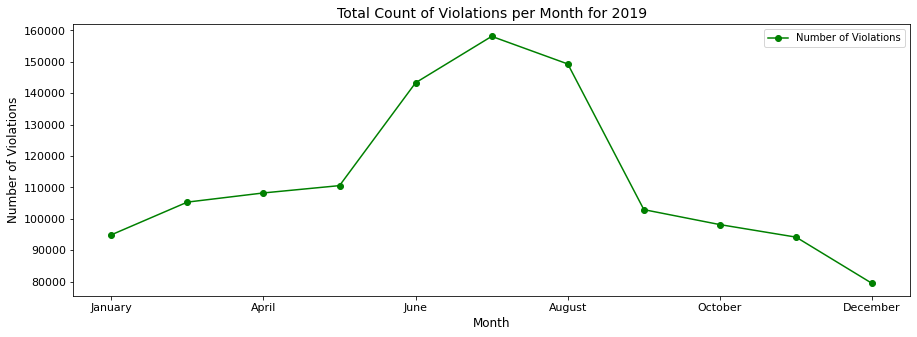

In [60]:
total_number_violations_per_month.plot(kind='line', x='Month', y='Number of Violations', color='green', marker = 'o', figsize=(15,5), fontsize=11)
plt.ylabel('Number of Violations', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Total Count of Violations per Month for 2019', fontsize=14)


print('149,324 violations were issued in DC during August accounting for 12.43% of the total number of violations issued.')
print('143,351 violations were issued during June, accounting for 11.93% of the total number of violations issued.')

## Two Charts for Each Month's Percent to Total
* Bar chart for percent to total by month
* Line chart for percent to total by month
* I have no idea why the line chart has ommitted every other month

### Bar Chart

* Please see descriptions for previous two charts

Text(0.5, 1.0, 'Percent to Total by Month for 2019')

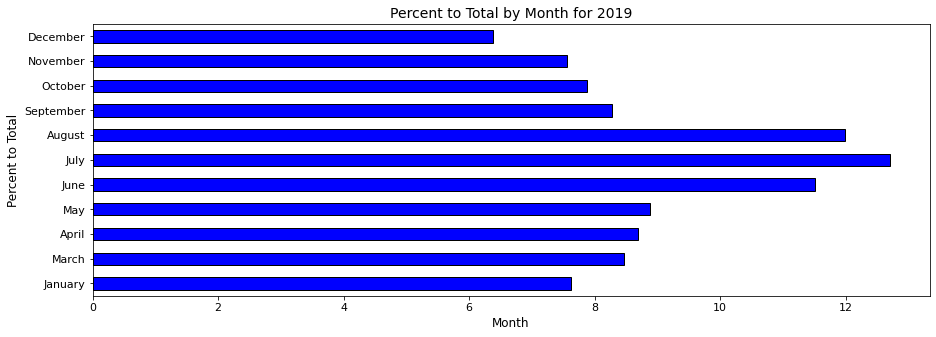

In [63]:
total_number_violations_per_month.plot(kind='barh', x='Month', y='Percent to Total', legend=False, color='blue', edgecolor = 'black', figsize=(15,5), fontsize=11)
plt.ylabel('Percent to Total', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Percent to Total by Month for 2019', fontsize=14)

### Line Chart

* Please see descriptions for previous two charts

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text major ticklabel objects>)

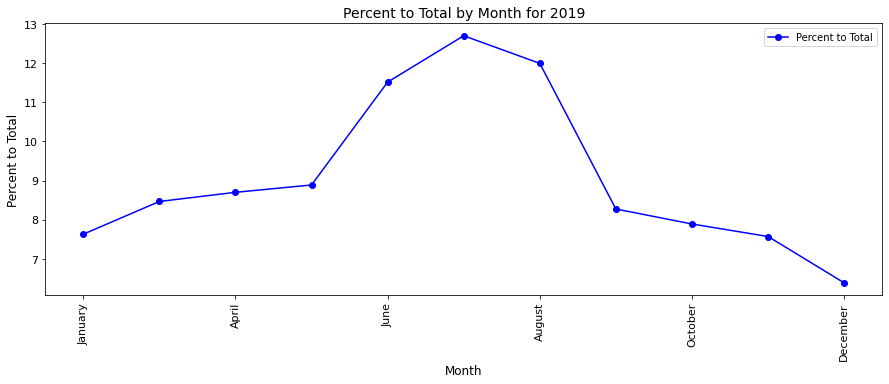

In [64]:
total_number_violations_per_month.plot(kind='line', x='Month', y='Percent to Total', color='blue', marker = 'o', figsize=(15,5), fontsize=11)
plt.ylabel('Percent to Total', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Percent to Total by Month for 2019', fontsize=14)
plt.xticks(rotation=90)

# Total number of each violation issued for each month and the year

## Determine the count of each type of violation for each month while dropping all unnecessary columns
* Using each individual month's CSV, count the number of violations issued and groupby 'Violation Process Description'

* Rename the column 'OBJECTID' according to the month I was working with in preparation for a new DataFrame which would hold each month's count

* Rename the index from 'VIOLATION_PROCESS_DESC' to 'Violation Desription' for clarity

* Repeat the process for all eleven months of 2019

* THE END OF THE CELL SHOWS AN EXAMPLE OF HOW EACH MONTH PRINTS

In [18]:
january_violations = january_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
january_violations = january_violations.rename(columns =  {'OBJECTID':'JANUARY'})
january_violations.index.name = 'VIOLATION DESCRIPTION'


march_violations = march_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
march_violations = march_violations.rename(columns =  {'OBJECTID':'MARCH'})
march_violations.index.name = 'VIOLATION DESCRIPTION'


april_violations = april_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
april_violations = april_violations.rename(columns =  {'OBJECTID':'APRIL'})
april_violations.index.name = 'VIOLATION DESCRIPTION'


may_violations = may_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
may_violations = may_violations.rename(columns =  {'OBJECTID':'MAY'})
may_violations.index.name = 'VIOLATION DESCRIPTION'


june_violations = june_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
june_violations = june_violations.rename(columns =  {'OBJECTID':'JUNE'})
june_violations.index.name = 'VIOLATION DESCRIPTION'


july_violations = july_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
july_violations = july_violations.rename(columns =  {'OBJECTID':'JULY'})
july_violations.index.name = 'VIOLATION DESCRIPTION'


august_violations = august_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
august_violations = august_violations.rename(columns =  {'OBJECTID':'AUGUST'})
august_violations.index.name = 'VIOLATION DESCRIPTION'


september_violations = september_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
september_violations = september_violations.rename(columns =  {'OBJECTID':'SEPTEMBER'})
september_violations.index.name = 'VIOLATION DESCRIPTION'


october_violations = october_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
october_violations = october_violations.rename(columns =  {'OBJECTID':'OCTOBER'})
october_violations.index.name = 'VIOLATION DESCRIPTION'


november_violations = november_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
november_violations = november_violations.rename(columns =  {'OBJECTID':'NOVEMBER'})
november_violations.index.name = 'VIOLATION DESCRIPTION'


december_violations = december_df.groupby('VIOLATION_PROCESS_DESC').count()[['OBJECTID']]
december_violations = december_violations.rename(columns =  {'OBJECTID':'DECEMBER'})
december_violations.index.name = 'VIOLATION DESCRIPTION'
december_violations

,DECEMBER
VIOLATION DESCRIPTION,
ALTERED TAGS,1
BACK UP WITHOUT CAUTION,14
BACKING TO TURN,2
BAD FOOT BRAKES,1
BIKE/PMD FAIL TO YIELD RIGHT OF WAY TO PED OR VEH,1
...,...
VIOLATION OF ONE WAY STREET RESTRICTION,10
VIOLATION OF RESTRICTION ON LEARNER'S PERMIT,12
VIOLATION OF THE CHILD RESTRAINT ACT,12


* This code merges each months DataFrame, starting with January and March (remember, February is missing)
* One month is merged at a time
* After each month is merged, we replace the NaN with 0 for better readability
* We create a column called 'YEARLY TOTALS' to hold the total of each violation using the variable 'counts'

In [65]:
# Merge each month's count together so that we have the total count of each violation per month for the whole 2019 year

jan_march = pd.merge(january_violations, march_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
jan_march

with_april = pd.merge(jan_march, april_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_april

with_may = pd.merge(with_april, may_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_may

with_june = pd.merge(with_may, june_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_june

with_july = pd.merge(with_june, july_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_july

with_august = pd.merge(with_july, august_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_august

with_september = pd.merge(with_august, september_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_september

with_october = pd.merge(with_september, october_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_october

with_november = pd.merge(with_october, november_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
with_november

violation_count_per_month_for_the_year = pd.merge(with_november, december_violations, on = 'VIOLATION DESCRIPTION', how = 'outer')
violation_count_per_month_for_the_year

# Replance NaN with 0
violation_count_per_month_for_the_year = violation_count_per_month_for_the_year.replace(np.nan,0)
violation_count_per_month_for_the_year

# Add up the vilation count for each month and store the info in 'counts'
counts = violation_count_per_month_for_the_year['JANUARY'] + violation_count_per_month_for_the_year['MARCH'] + violation_count_per_month_for_the_year['APRIL'] + violation_count_per_month_for_the_year['MAY'] + \
violation_count_per_month_for_the_year['JUNE'] + violation_count_per_month_for_the_year['JULY'] + violation_count_per_month_for_the_year['AUGUST'] + \
violation_count_per_month_for_the_year['SEPTEMBER'] + violation_count_per_month_for_the_year['OCTOBER'] + violation_count_per_month_for_the_year['NOVEMBER'] + \
violation_count_per_month_for_the_year['DECEMBER']

violation_count_per_month_for_the_year['YEARLY TOTALS'] = counts
#violation_count_per_month_for_the_year

* This code determines the percent of each violation compared to the year's total number of violations

In [66]:
percent = round(counts / total_number_of_violations_year* 100,10)
violation_count_per_month_for_the_year['PERCENT TO TOTAL VIOLATIONS'] = percent
violation_count_per_month_for_the_year

,JANUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YEARLY TOTALS,PERCENT TO TOTAL VIOLATIONS
VIOLATION DESCRIPTION,,,,,,,,,,,,,
ALTERED TAGS,4.0,4.0,1.0,3.0,6.0,1.0,6.0,7.0,1.0,5.0,1.0,39.0,0.003133
ALTERING A DRIVING PERMIT,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,8.0,0.000643
BACK UP WITHOUT CAUTION,19.0,25.0,22.0,24.0,21.0,6.0,26.0,18.0,22.0,14.0,14.0,211.0,0.016953
BACKING TO TURN,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,0.000643
BAD FOOT BRAKES,2.0,2.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0,14.0,0.001125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIOLATE BRIDGE LOAD LIMIT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000080
FAIL TO PROCEED WITH CAUTION THROUGH AN INCIDENT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000080
NO SNOW TIRE OR CHAIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000080


* Finally, this code sorts the DataFrame from highest to lowest so that we can clearly see which violations were most commonly issued
* *There are many violations which were only handed out once for the entire year, or account for 0.000083% of the total. These are violations we may want to consider dropping, or maybe we do a top 20 bottom 20 comparison*

In [21]:
sorted_violation_count_per_month_for_the_year = violation_count_per_month_for_the_year.sort_values(['PERCENT TO TOTAL VIOLATIONS'], ascending=False)
sorted_violation_count_per_month_for_the_year.reset_index(inplace=True)
sorted_violation_count_per_month_for_the_year.head()

,VIOLATION DESCRIPTION,JANUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YEARLY TOTALS,PERCENT TO TOTAL VIOLATIONS
0,SPEED 11-15 MPH OVER THE SPEED LIMIT,66246.0,73293.0,76465.0,75605.0,99232.0,108893.0,103765.0,67876.0,66086.0,62741.0,55544.0,855746.0,68.754389
1,SPEED 16-20 MPH OVER THE SPEED LIMIT,12060.0,12931.0,13334.0,13297.0,20866.0,26064.0,23112.0,14368.0,14122.0,14341.0,10342.0,174837.0,14.047172
2,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,4696.0,5073.0,5305.0,5737.0,5585.0,4713.0,4659.0,4534.0,4590.0,3989.0,3459.0,52340.0,4.205225
3,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,2590.0,2796.0,2837.0,4110.0,5205.0,7090.0,4882.0,5305.0,3293.0,2619.0,1622.0,42349.0,3.402504
4,SPEED 21-25 MPH OVER THE SPEED LIMIT,1949.0,2239.0,2274.0,2231.0,3678.0,5386.0,4538.0,2901.0,2761.0,3176.0,1792.0,32925.0,2.645339


### Line Chart showing the top 5 most issued violations by month for 2019

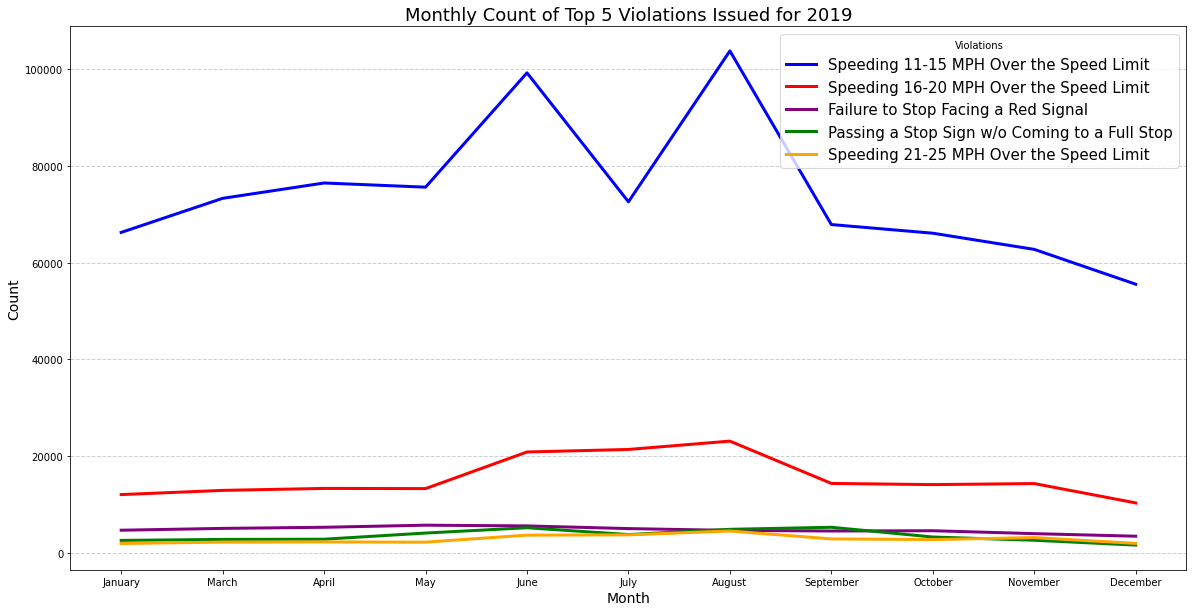

In [22]:
x_axis = ('January', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
x_axis

speed_11_to_15 = [66246,73293,76465,75605,99232,72579,103765,67876,66086,62741,55544]
speed_16_to_20 = [12060,12931,13334,13297,20866,21390,23112,14368,14122,14341,10342]
fail_stop_red_signal = [4696,5073,5305,5737,5585,5033,4659,4534,4590,3989,3459]
passing_stop_sign = [2595, 2795, 2837, 4111, 5205, 3800, 4882, 5305, 3293, 2619, 1622]
speed_21_to_25 = [1949,2239,2274,2231,3678,3737,4538,2901,2761,3176,1972]

plt.figure(figsize=(20, 10))

first = plt.plot(x_axis, speed_11_to_15, linewidth=3, color='blue', label='Speeding 11-15 MPH Over the Speed Limit')
second = plt.plot(x_axis, speed_16_to_20, linewidth=3, color='red', label='Speeding 16-20 MPH Over the Speed Limit')
third = plt.plot(x_axis, fail_stop_red_signal, linewidth=3, color='purple', label='Failure to Stop Facing a Red Signal')
fourth = plt.plot(x_axis, passing_stop_sign, linewidth=3, color='green', label='Passing a Stop Sign w/o Coming to a Full Stop')
fifth = plt.plot(x_axis, speed_21_to_25, linewidth=3, color='orange', label='Speeding 21-25 MPH Over the Speed Limit')

plt.legend(fontsize= 15, title='Violations', loc='upper right')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Monthly Count of Top 5 Violations Issued for 2019', fontsize=18)
plt.show()

### Create a Bar Chart showing the Top 10 violations issued for 2019

THE TOP 5 VIOLATIONS ISSUED DURING 2019 WERE:
Speed 11-15 MPH Over the Speed Limit: 819,432
Speed 16-20 MPH Over the Speed Limit: 170,163
Fail to Stop Per Regulations Facing Red Signal: 52,660
Passing Stop Sign Without Coming to a Full Stop: 39,064
Speed 21-25 MPH Over the Speed Limit: 31,276


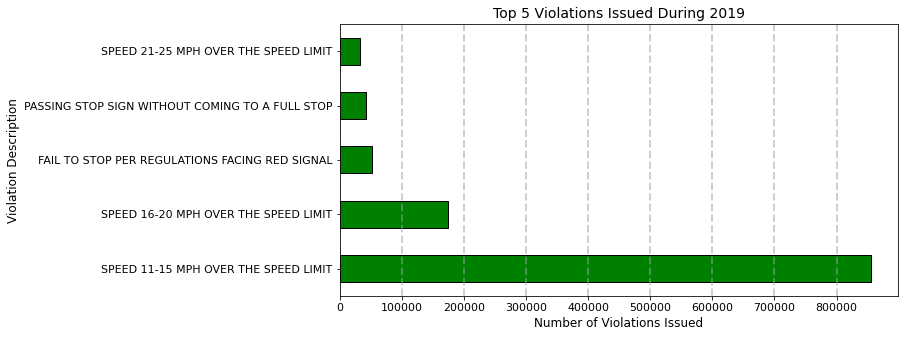

In [23]:
sorted_violation_count_per_month_for_the_year.head(5).plot(kind='barh', x='VIOLATION DESCRIPTION', y='YEARLY TOTALS', legend=False, color='green', edgecolor = 'black', figsize=(10,5), fontsize=11)
plt.ylabel('Violation Description', fontsize=12)
plt.xlabel('Number of Violations Issued', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.5)
plt.title('Top 5 Violations Issued During 2019', fontsize=14)

print('THE TOP 5 VIOLATIONS ISSUED DURING 2019 WERE:')
print('Speed 11-15 MPH Over the Speed Limit: 819,432')
print('Speed 16-20 MPH Over the Speed Limit: 170,163')
print('Fail to Stop Per Regulations Facing Red Signal: 52,660')
print('Passing Stop Sign Without Coming to a Full Stop: 39,064')
print('Speed 21-25 MPH Over the Speed Limit: 31,276')

# Total number of violations issued per agency for each month and the year

In [24]:
# Gene's Code 
# From the location column what area issues the most violations (Are more violations issued in a particular area of the city?)
area_issues_most = clean_twozeroonenine_df['LOCATION'].value_counts()

df_area=pd.DataFrame(area_issues_most)
max_area = df_area.iloc[0]
max_area

LOCATION    84866
Name: DC 295 .4mi s/o PA Ave SE sw/b (WZ), dtype: int64

In [25]:
df_area.head(10)

,LOCATION
DC 295 .4mi s/o PA Ave SE sw/b (WZ),84866
DC295 SW .2 miles s/o E/1 n/b (WZ),72814
600 blk Kenilworth Ave NE s/b,64304
2200 block K St NW e/b,42775
2200 blk K St NW w/b,38693
100 blk Michigan Ave NW e/b,28383
600 blk New York Avenue NE w/b,26606
2200 blk South Dakota Ave NE se/b,25903
3700 blk Southern Ave SE sw/b,23575
2500 BLK INDEPENDENCE AVE SE NE/B,21371


In [26]:
# Gene's Code 
# From the location column what area issues the least violations (Are more violations issued in a particular area of the city?)
min_area = df_area.iloc[-1]
min_area

LOCATION    1
Name: AT  PENNSYLVANIA AVE NW  @20TH ST *, dtype: int64

### Determine the violation count for each division for 2019
* Groupby 'ISSUING_AGENCY_NAME' and count the number of 'OBJECTID' for each
* Reset the index so that 'ISSUING_AGENCY_NAME' becomes a column
* Rename 'ISSUING_AGENCY_NAME' to 'AGENCY' and 'OBJECTID' to 'COUNT'
* Sort the 'COUNT' by decending order

In [67]:
# Gene's Code
agency_counts = clean_twozeroonenine_df.groupby('ISSUING_AGENCY_NAME').count()[['OBJECTID']]
agency_counts.reset_index(inplace=True)
agency_counts= agency_counts.rename(columns = {'ISSUING_AGENCY_NAME':'AGENCY', 'OBJECTID': 'VIOLATIONS ISSUED'})
top_five_agencies = agency_counts.sort_values(['VIOLATIONS ISSUED'], ascending=False).head()
top_five_agencies

,AGENCY,VIOLATIONS ISSUED
29,SPECIAL OPERATION DIV & TRAFFIC DIV,1172024
14,METROPOLITAN POLICE DPT-DISTRICT 2,16260
13,METROPOLITAN POLICE DPT-DISTRICT 1,11217
15,METROPOLITAN POLICE DPT-DISTRICT 3,10483
18,METROPOLITAN POLICE DPT-DISTRICT 6,10140


### Add a chart (Pie) showing 5 ten agencies and their respective violation counts

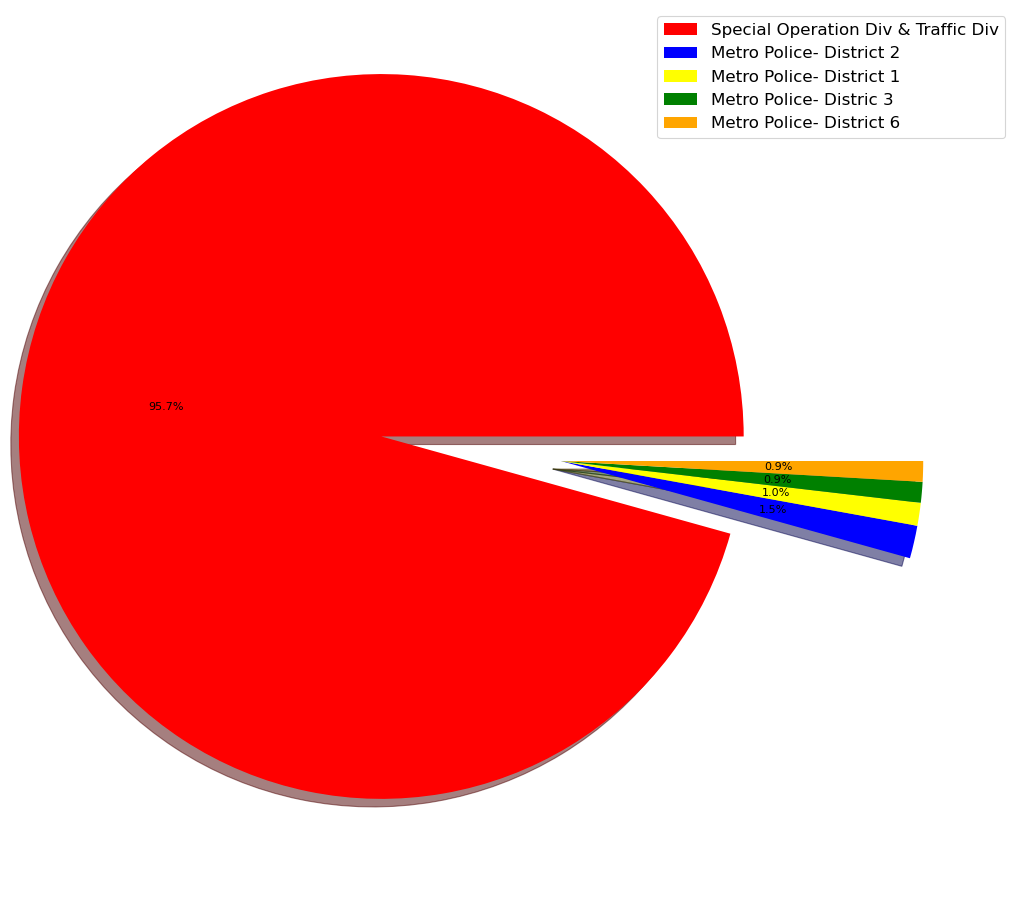

In [28]:
violations = [1124348, 17177, 11997, 10857, 10774]
colors = ['red', 'blue', 'yellow', 'green', 'orange']
explode = (0.5, 0, 0, 0, 0)
plt.figure(figsize=(15,15), dpi=80)
plt.pie(violations, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%')
plt.legend(labels=['Special Operation Div & Traffic Div', 'Metro Police- District 2', 'Metro Police- District 1', 'Metro Police- Distric 3', 'Metro Police- District 6'],loc='upper right', fontsize=15)



In [29]:
agency_total = agency_counts['VIOLATIONS ISSUED'].sum()
agency_total

1244642

# Total count of violations broken down by weekday for 2019

### Print the combined, clean DataFrame for reference

In [30]:
clean_twozeroonenine_df.head()

,OBJECTID,LOCATION,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,FINE_AMOUNT,DRV_LIC_STATE,DOB_YEAR,VEH_MAKE
0,8730,1400 BRANCH AVE SE,2019/04/29 04:00:00+00,1:30:00,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,FOLLOW A VEHICLE TOO CLOSELY,DC,N,100.0,DC,1985.0,CHRY
1,8731,I-295 ANACOSTIA FWY,2019/04/01 04:00:00+00,9:55:00,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,FOLLOW A VEHICLE TOO CLOSELY,DC,N,75.0,DC,1972.0,HOND
2,10053,I 395 N/B HOV BRIDGE SW,2019/04/18 04:00:00+00,4:20:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,VA,Y,100.0,VA,1987.0,MAZD
3,10054,1000 6TH ST NW,2019/04/23 04:00:00+00,3:00:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,DC,Y,150.0,DC,1993.0,TOYO
4,10055,1000 6TH ST NW,2019/04/23 04:00:00+00,3:00:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T667,DEAD OR EXPIRED TAGS,DC,Y,100.0,DC,1993.0,TOYO


### Here we used pd.date_range to assigne a number to each day of the week
* Monday = 0 to Sunday = 6

In [31]:
s = pd.date_range('2019/01/01 04:00:00+00', '2019/12/31 04:00:00+00', freq= 'D').to_series()
s.dt.dayofweek
     

2019-01-01 04:00:00+00:00    1
2019-01-02 04:00:00+00:00    2
2019-01-03 04:00:00+00:00    3
2019-01-04 04:00:00+00:00    4
2019-01-05 04:00:00+00:00    5
                            ..
2019-12-27 04:00:00+00:00    4
2019-12-28 04:00:00+00:00    5
2019-12-29 04:00:00+00:00    6
2019-12-30 04:00:00+00:00    0
2019-12-31 04:00:00+00:00    1
Freq: D, Length: 365, dtype: int64

### Assign each number 0 - 6 to the corresponding day of the week Monday-Sunday
* Not sure what 'clean_twozeroonenine_df['ISSUE_DATE']= pd.to_datetime(clean_twozeroonenine_df['ISSUE_DATE'])' does
* Last line adds a column called 'Day of the Week?

In [32]:
# Sandra's Code

days = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
clean_twozeroonenine_df['ISSUE_DATE']= pd.to_datetime(clean_twozeroonenine_df['ISSUE_DATE'])
clean_twozeroonenine_df['DAY_OF_THE_WEEK'] = clean_twozeroonenine_df['ISSUE_DATE'].dt.day_name()
clean_twozeroonenine_df

<ipython-input-32-e1f476d43b5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twozeroonenine_df['ISSUE_DATE']= pd.to_datetime(clean_twozeroonenine_df['ISSUE_DATE'])
<ipython-input-32-e1f476d43b5e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twozeroonenine_df['DAY_OF_THE_WEEK'] = clean_twozeroonenine_df['ISSUE_DATE'].dt.day_name()


,OBJECTID,LOCATION,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,FINE_AMOUNT,DRV_LIC_STATE,DOB_YEAR,VEH_MAKE,DAY_OF_THE_WEEK
0,8730,1400 BRANCH AVE SE,2019-04-29 04:00:00+00:00,1:30:00,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,FOLLOW A VEHICLE TOO CLOSELY,DC,N,100.0,DC,1985.0,CHRY,Monday
1,8731,I-295 ANACOSTIA FWY,2019-04-01 04:00:00+00:00,9:55:00,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T043,FOLLOW A VEHICLE TOO CLOSELY,DC,N,75.0,DC,1972.0,HOND,Monday
2,10053,I 395 N/B HOV BRIDGE SW,2019-04-18 04:00:00+00:00,4:20:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,VA,Y,100.0,VA,1987.0,MAZD,Thursday
3,10054,1000 6TH ST NW,2019-04-23 04:00:00+00:00,3:00:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T335,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,DC,Y,150.0,DC,1993.0,TOYO,Tuesday
4,10055,1000 6TH ST NW,2019-04-23 04:00:00+00:00,3:00:00,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T667,DEAD OR EXPIRED TAGS,DC,Y,100.0,DC,1993.0,TOYO,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244637,9187235,E Capitol St e/b @ Texas Ave SE,2019-09-29 04:00:00+00:00,2:46:00,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,,NaN,100.0,NaN,NaN,RAM,Sunday
1244638,9187236,E Capitol St e/b @ Texas Ave SE,2019-09-29 04:00:00+00:00,2:59:00,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T121,SPEED 21-25 MPH OVER THE SPEED LIMIT,,NaN,200.0,NaN,NaN,HOND,Sunday
1244639,9187237,E Capitol St e/b @ Texas Ave SE,2019-09-29 04:00:00+00:00,3:49:00,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,,NaN,100.0,NaN,NaN,ACUR,Sunday
1244640,9187238,E Capitol St e/b @ Texas Ave SE,2019-09-29 04:00:00+00:00,4:49:00,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,,NaN,100.0,DC,1965.0,HOND,Sunday


* Create a table called Violations by Day of Week
* Group by the day of the week, and how many violations were issued for each of those days
* Rename the column 'OBJECTID' to 'Count'
* Print that puppy out

In [33]:
# Sandra's Code

violations_by_day_of_week = clean_twozeroonenine_df.groupby('DAY_OF_THE_WEEK').count()[['OBJECTID']]
violations_by_day_of_week.reset_index(inplace=True)
violations_by_day_of_week = violations_by_day_of_week.rename(columns = {'OBJECTID':'Count'})
violations_by_day_of_week


,DAY_OF_THE_WEEK,Count
0,Friday,172254
1,Monday,151199
2,Saturday,232162
3,Sunday,217423
4,Thursday,163064
5,Tuesday,151745
6,Wednesday,156795


### Create a Bar Chart showing each day of the week and the amount of violations issued for each day

Text(0.5, 1.0, 'Violations Issued for 2019 by Weekday')

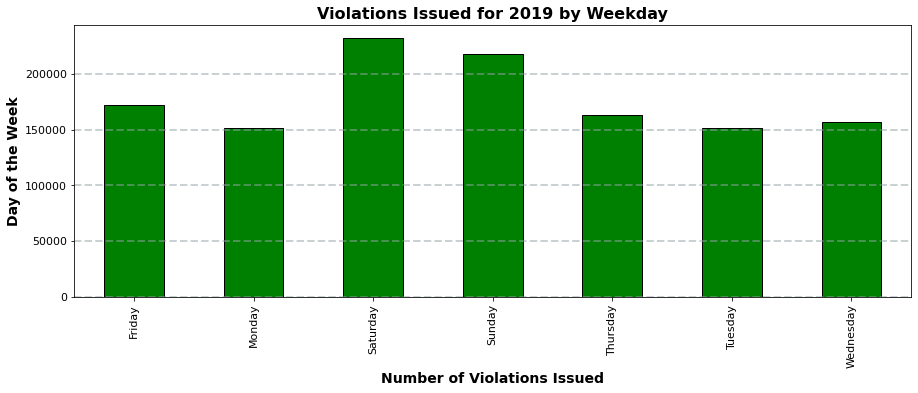

In [34]:
# Sandra's Code

violations_by_day_of_week.plot(kind='bar', x='DAY_OF_THE_WEEK', y='Count', legend=False, color='green', edgecolor = 'black', figsize=(15,5), fontsize=11)
plt.ylabel('Day of the Week', weight='bold', fontsize=14)
plt.xlabel('Number of Violations Issued', weight='bold', fontsize=14)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
plt.title('Violations Issued for 2019 by Weekday', weight='bold', fontsize=16)

# Violations issued by age group

* Print the max and min from 'DOB YEAR' column to determine high and low age groups

In [35]:
# Fraol and Sree's Code

print(clean_twozeroonenine_df["DOB_YEAR"].max())
print(clean_twozeroonenine_df["DOB_YEAR"].min())

8199.0
1697.0


In [36]:
# Fraol and Sree's Code

clean_twozeroonenine_df["DOB_YEAR"].value_counts()

1989.0    7864
1991.0    7662
1990.0    7615
1988.0    7507
1987.0    7374
          ... 
1813.0       1
1736.0       1
2018.0       1
8199.0       1
8197.0       1
Name: DOB_YEAR, Length: 106, dtype: int64

* Create bins for the age groups (by decade)
* Label the bins according to the decade's age
* Create a series that shows the age group and count of how many people that received violations for each group

In [37]:
# Fraol and Sree's Code

bins = [1903, 1919.999, 1929.999, 1939.999, 1949.999, 1959.99, 1969.999, 1979.99, 1989.999, 1999.999, 2009]

group_labels = ["over 100", "90 to 100","80 to 90", "70 to 80", "60 to 70","50 to 60", "40 to 50", "30 to 40", "20 to 30", "below 20" ]

clean_twozeroonenine_df["AGE_GROUP"] = pd.cut(clean_twozeroonenine_df["DOB_YEAR"], bins, labels = group_labels)


age_df = clean_twozeroonenine_df['AGE_GROUP']
age_grp = age_df.value_counts()
age_grp.head()

<ipython-input-37-4021521c6acd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twozeroonenine_df["AGE_GROUP"] = pd.cut(clean_twozeroonenine_df["DOB_YEAR"], bins, labels = group_labels)


30 to 40    71466
40 to 50    52891
20 to 30    47502
50 to 60    42777
60 to 70    28263
Name: AGE_GROUP, dtype: int64

### Create a Bar Chart showing the member count of each age group

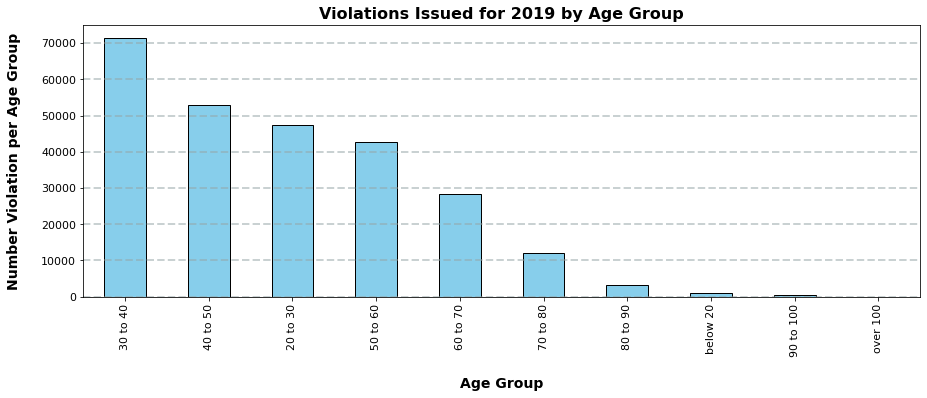

<Figure size 432x288 with 0 Axes>

In [38]:
# Fraol and Sree's Code

# Create a bar chart based off of the group series from before
age_grp_chart = age_grp.plot(kind="bar", color='skyblue', edgecolor = 'black', figsize=(15,5), fontsize=11)

# Set the xlabel and ylabel using class methods
age_grp_chart.set_xlabel("Age Group", labelpad=20, weight='bold', size=14,)
age_grp_chart.set_ylabel("Number Violation per Age Group", labelpad=20, weight='bold', size=14)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
plt.title('Violations Issued for 2019 by Age Group', weight='bold', fontsize=16)

plt.show()
plt.tight_layout()

In [39]:
temp_df = clean_twozeroonenine_df.loc[:,["ISSUE_DATE","VIOLATION_PROCESS_DESC","DRV_LIC_STATE","FINE_AMOUNT"]]
temp_df = temp_df[temp_df['DRV_LIC_STATE'].isin(["DC","MD","VA"])==True]
temp_df.dropna(subset=["DRV_LIC_STATE"]) 
#temp_df

,ISSUE_DATE,VIOLATION_PROCESS_DESC,DRV_LIC_STATE,FINE_AMOUNT
0,2019-04-29 04:00:00+00:00,FOLLOW A VEHICLE TOO CLOSELY,DC,100.0
1,2019-04-01 04:00:00+00:00,FOLLOW A VEHICLE TOO CLOSELY,DC,75.0
2,2019-04-18 04:00:00+00:00,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,VA,100.0
3,2019-04-23 04:00:00+00:00,FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING,DC,150.0
4,2019-04-23 04:00:00+00:00,DEAD OR EXPIRED TAGS,DC,100.0
...,...,...,...,...
1244630,2019-09-28 04:00:00+00:00,SPEED 11-15 MPH OVER THE SPEED LIMIT,DC,100.0
1244632,2019-09-28 04:00:00+00:00,SPEED 16-20 MPH OVER THE SPEED LIMIT,DC,150.0
1244634,2019-09-28 04:00:00+00:00,SPEED 11-15 MPH OVER THE SPEED LIMIT,DC,100.0
1244635,2019-09-29 04:00:00+00:00,SPEED 11-15 MPH OVER THE SPEED LIMIT,DC,100.0


In [40]:
#temp_df.columns

In [41]:
x = temp_df.loc[temp_df['DRV_LIC_STATE'] == 'DC']
y = x['VIOLATION_PROCESS_DESC'].value_counts()
#y

In [42]:
dc_top_5_violations = pd.DataFrame(y)
dc_top_5_violations.reset_index(inplace=True)

In [43]:
dc_violations = dc_top_5_violations.rename(columns= {'index':'Violation Description', 'VIOLATION_PROCESS_DESC': 'Violation Count'})


In [44]:
dc_violations

,Violation Description,Violation Count
0,SPEED 11-15 MPH OVER THE SPEED LIMIT,133421
1,SPEED 16-20 MPH OVER THE SPEED LIMIT,20826
2,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,14811
3,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,10107
4,TURN RIGHT ON RED WITHOUT COMPLETE STOP,4726
...,...,...
213,LEAVING A MOTOR RUNNING UNATTENDED,1
214,EXCESSIVE IDLING,1
215,DRIVE OVER A FIRE HOSE,1
216,DRIVE VEHICLE ON THE WHEEL RIM WITHOUT A TIRE,1


Text(0.5, 1.0, 'Top 5 Violations Issued to DC (2019)')

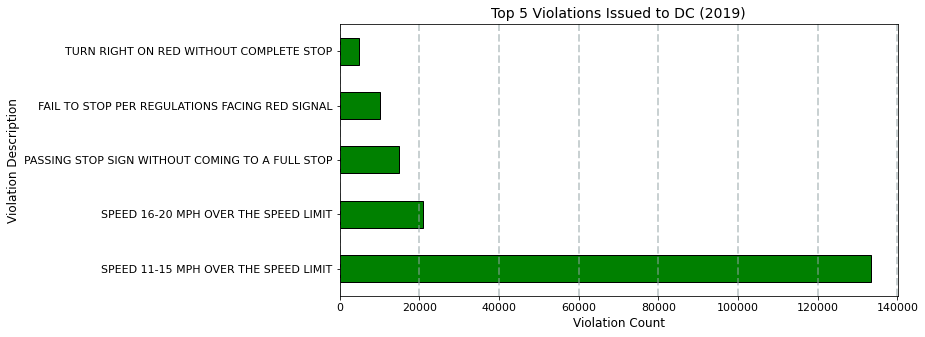

In [45]:
dc_violations.head(5).plot(kind='barh', x='Violation Description', y='Violation Count', legend=False, color='green', edgecolor = 'black', figsize=(10,5), fontsize=11)
plt.ylabel('Violation Description', fontsize=12)
plt.xlabel('Violation Count', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.5)
plt.title('Top 5 Violations Issued to DC (2019)', fontsize=14)


In [46]:
a = temp_df.loc[temp_df['DRV_LIC_STATE'] == 'MD']
b = a['VIOLATION_PROCESS_DESC'].value_counts()
#b

In [47]:
md_top_5_violations = pd.DataFrame(y)
md_top_5_violations.reset_index(inplace=True)

In [48]:
md_violations = md_top_5_violations.rename(columns= {'index':'Violation Description', 'VIOLATION_PROCESS_DESC': 'Violation Count'})
#md_violations

Text(0.5, 1.0, 'Top 5 Violations Issued to Maryland (2019)')

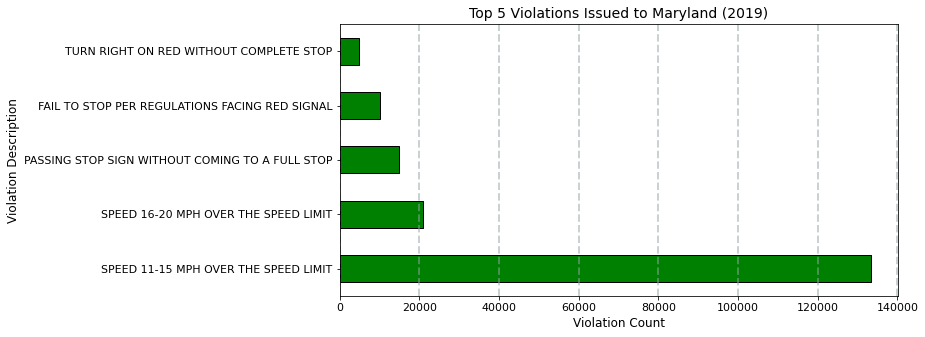

In [49]:
md_violations.head(5).plot(kind='barh', x='Violation Description', y='Violation Count', legend=False, color='green', edgecolor = 'black', figsize=(10,5), fontsize=11)
plt.ylabel('Violation Description', fontsize=12)
plt.xlabel('Violation Count', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.5)
plt.title('Top 5 Violations Issued to Maryland (2019)', fontsize=14)

In [50]:
c = temp_df.loc[temp_df['DRV_LIC_STATE'] == 'VA']
d = c['VIOLATION_PROCESS_DESC'].value_counts()
#d

In [51]:
va_top_5_violations = pd.DataFrame(y)
va_top_5_violations.reset_index(inplace=True)

In [52]:
va_violations = va_top_5_violations.rename(columns= {'index':'Violation Description', 'VIOLATION_PROCESS_DESC': 'Violation Count'})
va_violations


,Violation Description,Violation Count
0,SPEED 11-15 MPH OVER THE SPEED LIMIT,133421
1,SPEED 16-20 MPH OVER THE SPEED LIMIT,20826
2,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,14811
3,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,10107
4,TURN RIGHT ON RED WITHOUT COMPLETE STOP,4726
...,...,...
213,LEAVING A MOTOR RUNNING UNATTENDED,1
214,EXCESSIVE IDLING,1
215,DRIVE OVER A FIRE HOSE,1
216,DRIVE VEHICLE ON THE WHEEL RIM WITHOUT A TIRE,1


Text(0.5, 1.0, 'Top 5 Violations Issued to Virgina (2019)')

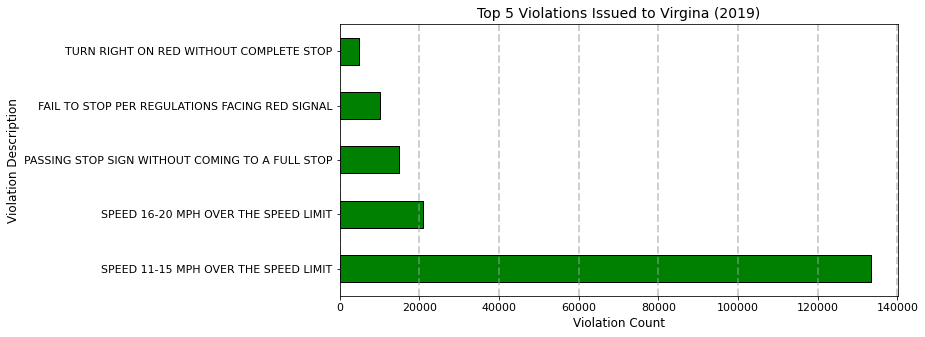

In [53]:
va_violations.head(5).plot(kind='barh', x='Violation Description', y='Violation Count', legend=False, color='green', edgecolor = 'black', figsize=(10,5), fontsize=11)
plt.ylabel('Violation Description', fontsize=12)
plt.xlabel('Violation Count', fontsize=12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.5)
plt.title('Top 5 Violations Issued to Virgina (2019)', fontsize=14)